<a href="https://colab.research.google.com/github/WhiteTeaDragon/SingularValues/blob/main/PerformanceExperimentsTT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import functions
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [ ]:
importlib.reload(functions)

<module 'functions' from '/content/functions.py'>

Время на обучение у разных моделей может отличаться -- это происходит из-за того, что они обучались в разных сессиях Google Colab.

### Loading Data

In [2]:
num_classes = 10

# load the CIFAR10 data.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# input image dimensions.
input_shape = x_train.shape[1:]

# normalize data.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# if subtract pixel mean is enabled
x_train_mean = np.mean(x_train, axis=0)
x_train -= x_train_mean
x_test -= x_train_mean

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('y_train shape:', y_train.shape)

# convert class vectors to binary class matrices.
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

170500096/170498071 [==============================] - 6s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
y_train shape: (50000, 1)


### decomposition_rank = 1

#### Model without clipping

In [3]:
model, model_type = functions.define_and_compile_ResNet_model(
    input_shape, conv_layer = functions.ConvDecomposed2D, decomposition_rank=1)
model.summary()

Learning rate:  0.001
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv_decomposed2d (ConvDecompos (None, 32, 32, 16)   44          input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 16)   64          conv_decomposed2d[0][0]          
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 16)   0           batch_normalization[0][0]        
________________________________________________________________________

In [4]:
history = functions.run_training(model, model_type, x_train, y_train, x_test, y_test,
                       'trainHistoryDict', steps_per_epoch=100, batch_size=100, epochs=500)

Using real-time data augmentation.
Epoch 1/500
Learning rate:  0.001
100/100 [==============================] - 49s 103ms/step - loss: 3.1076 - acc: 0.1077 - val_loss: 2.5621 - val_acc: 0.0933

Epoch 00001: val_acc improved from -inf to 0.09330, saving model to /content/saved_models/cifar10_ResNet32v1_model.001.h5
Epoch 2/500
Learning rate:  0.001
100/100 [==============================] - 8s 83ms/step - loss: 2.5431 - acc: 0.1136 - val_loss: 2.5411 - val_acc: 0.1028

Epoch 00002: val_acc improved from 0.09330 to 0.10280, saving model to /content/saved_models/cifar10_ResNet32v1_model.002.h5
Epoch 3/500
Learning rate:  0.001
100/100 [==============================] - 8s 84ms/step - loss: 2.4977 - acc: 0.1292 - val_loss: 2.5597 - val_acc: 0.0999

Epoch 00003: val_acc did not improve from 0.10280
Epoch 4/500
Learning rate:  0.001
100/100 [==============================] - 8s 83ms/step - loss: 2.4825 - acc: 0.1277 - val_loss: 2.5310 - val_acc: 0.1046

Epoch 00004: val_acc improved from 0.1

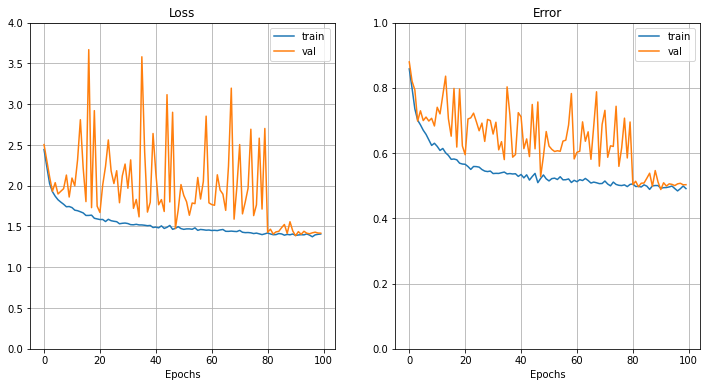

In [5]:
import pickle
from matplotlib import pyplot as plt

history = pickle.load(open('trainHistoryDict', "rb"))
functions.plot_loss_acc(history, 4, 1)

In [6]:
1 - history['val_acc'][-1]

0.5031999945640564

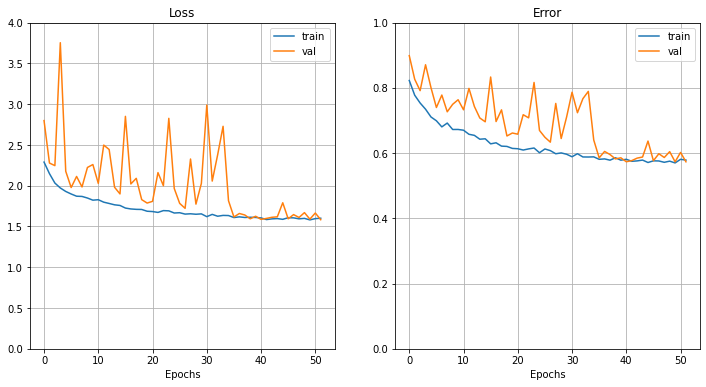

In [ ]:
import pickle
from matplotlib import pyplot as plt

history = pickle.load(open('trainHistoryDict', "rb"))
functions.plot_loss_acc(history, 4, 1)

In [ ]:
1 - history['val_acc'][-1]

0.5733000040054321

#### Model with clipping to 0.5

In [7]:
model, model_type = functions.define_and_compile_ResNet_model(
    input_shape, conv_layer = functions.ConvDecomposed2D, decomposition_rank=1)

Learning rate:  0.001


In [8]:
callbacks = functions.standard_callbacks(model_type) + [functions.Clipping(0.5)]
history = functions.run_training(model, model_type, x_train, y_train, x_test, y_test,
                       'trainHistoryDict_clip_05', steps_per_epoch=100, epochs=500,
                       batch_size=100,
                       callbacks=callbacks)

Using real-time data augmentation.
Epoch 1/500
Learning rate:  0.001
100/100 [==============================] - 16s 96ms/step - loss: 3.2765 - acc: 0.1185 - val_loss: 2.5798 - val_acc: 0.0970

Epoch 00001: val_acc improved from -inf to 0.09700, saving model to /content/saved_models/cifar10_ResNet32v1_model.001.h5
Epoch 2/500
Learning rate:  0.001
100/100 [==============================] - 8s 83ms/step - loss: 2.2951 - acc: 0.1169 - val_loss: 2.3347 - val_acc: 0.1000

Epoch 00002: val_acc improved from 0.09700 to 0.10000, saving model to /content/saved_models/cifar10_ResNet32v1_model.002.h5
Epoch 3/500
Learning rate:  0.001
100/100 [==============================] - 8s 82ms/step - loss: 2.2186 - acc: 0.1627 - val_loss: 2.3291 - val_acc: 0.1000

Epoch 00003: val_acc did not improve from 0.10000
Epoch 4/500
Learning rate:  0.001
100/100 [==============================] - 8s 83ms/step - loss: 2.1872 - acc: 0.1877 - val_loss: 2.3467 - val_acc: 0.1000

Epoch 00004: val_acc did not improve fr

In [13]:
425 / 5

85.0

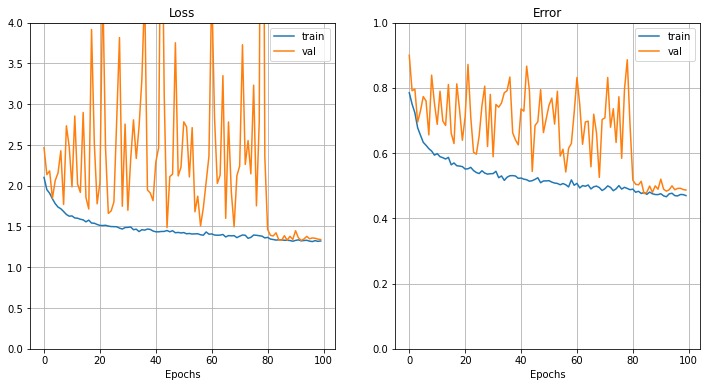

In [9]:
import pickle
from matplotlib import pyplot as plt

history = pickle.load(open('trainHistoryDict_clip_05', "rb"))
functions.plot_loss_acc(history, 4, 1)

In [12]:
1 - history['val_acc'][-1]

0.48680001497268677

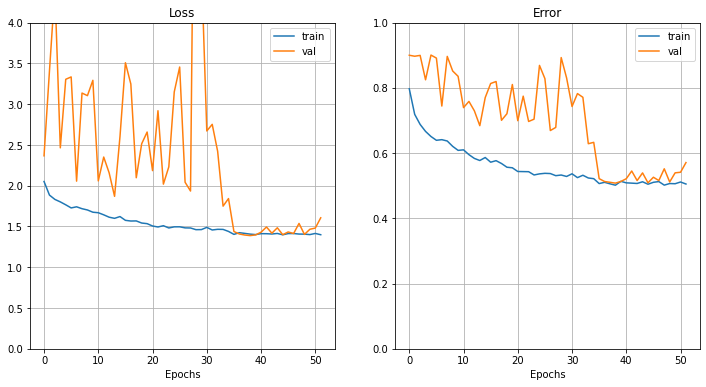

In [ ]:
import pickle
from matplotlib import pyplot as plt

history = pickle.load(open('trainHistoryDict_clip_05', "rb"))
functions.plot_loss_acc(history, 4, 1)

In [ ]:
1 - history['val_acc'][-1]

0.5708999931812286

#### Model with clipping to 1

In [11]:
model, model_type = functions.define_and_compile_ResNet_model(
    input_shape, conv_layer = functions.ConvDecomposed2D, decomposition_rank=1)

Learning rate:  0.001


In [4]:
callbacks = functions.standard_callbacks(model_type) + [functions.Clipping(1)]
history = functions.run_training(model, model_type, x_train, y_train, x_test, y_test,
                       'trainHistoryDict_clip_1', steps_per_epoch=100, epochs=500,
                       batch_size=100,
                       callbacks=callbacks)

Using real-time data augmentation.
Epoch 1/500
Learning rate:  0.001
100/100 [==============================] - 57s 193ms/step - loss: 3.1949 - acc: 0.1217 - val_loss: 2.6224 - val_acc: 0.1080

Epoch 00001: val_acc improved from -inf to 0.10800, saving model to /content/saved_models/cifar10_ResNet32v1_model.001.h5
Epoch 2/500
Learning rate:  0.001
100/100 [==============================] - 17s 167ms/step - loss: 2.2874 - acc: 0.1331 - val_loss: 2.3819 - val_acc: 0.1000

Epoch 00002: val_acc did not improve from 0.10800
Epoch 3/500
Learning rate:  0.001
100/100 [==============================] - 17s 168ms/step - loss: 2.1845 - acc: 0.1830 - val_loss: 2.3803 - val_acc: 0.1000

Epoch 00003: val_acc did not improve from 0.10800
Epoch 4/500
Learning rate:  0.001
100/100 [==============================] - 17s 167ms/step - loss: 2.1460 - acc: 0.1859 - val_loss: 2.4163 - val_acc: 0.1000

Epoch 00004: val_acc did not improve from 0.10800
Epoch 5/500
Learning rate:  0.001
100/100 [==============

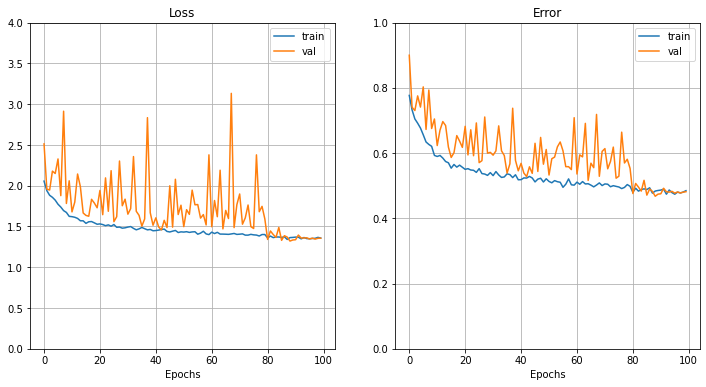

In [5]:
import pickle
from matplotlib import pyplot as plt

history = pickle.load(open('trainHistoryDict_clip_1', "rb"))
functions.plot_loss_acc(history, 4, 1)

In [6]:
1 - history['val_acc'][-1]

0.48170000314712524

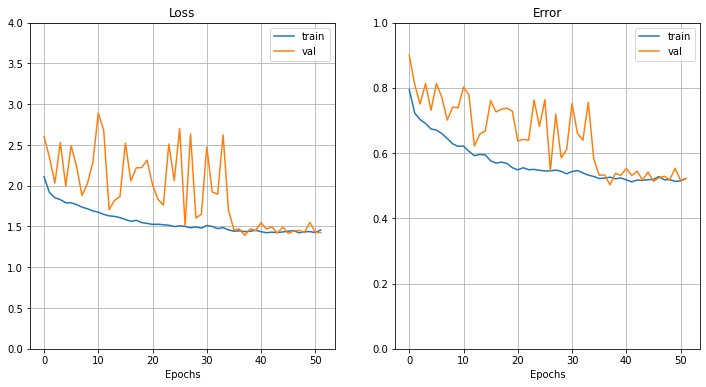

In [ ]:
import pickle
from matplotlib import pyplot as plt

history = pickle.load(open('trainHistoryDict_clip_1', "rb"))
functions.plot_loss_acc(history, 4, 1)

In [ ]:
1 - history['val_acc'][-1]

0.5221000015735626

#### Plotting final graph

In [7]:
def plot_final_graph(addition=""):
    history_no_clipping = pickle.load(open(addition + 'trainHistoryDict', "rb"))
    history_05 = pickle.load(open(addition + 'trainHistoryDict_clip_05', "rb"))
    history_1 = pickle.load(open(addition + 'trainHistoryDict_clip_1', "rb"))
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    axs[0].grid(True)
    axs[1].grid(True)
    max_len = len(history_no_clipping['val_loss'])
    axs[0].plot(history_no_clipping['val_loss'][4:max_len:5], label='no clipping')
    axs[0].plot(history_05['val_loss'][4:max_len:5], label='0.5')
    axs[0].plot(history_1['val_loss'][4:max_len:5], label='1')
    axs[0].set_title('Loss')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylim(0, 4)
    axs[1].plot(1 - np.array(history_no_clipping['val_acc'][4:max_len:5]), label='no clipping')
    axs[1].plot(1 - np.array(history_05['val_acc'][4:max_len:5]), label='0.5')
    axs[1].plot(1 - np.array(history_1['val_acc'][4:max_len:5]), label='1')
    axs[1].set_title('Error')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylim(0, 1)
    axs[0].legend(loc='best')
    axs[1].legend(loc='best')

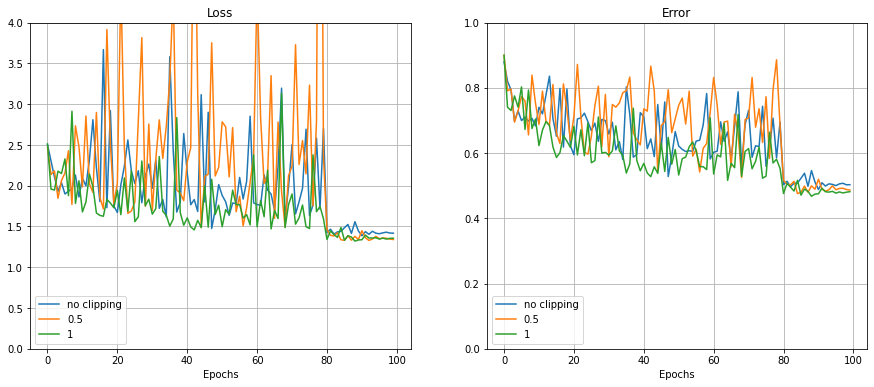

In [9]:
plot_final_graph()

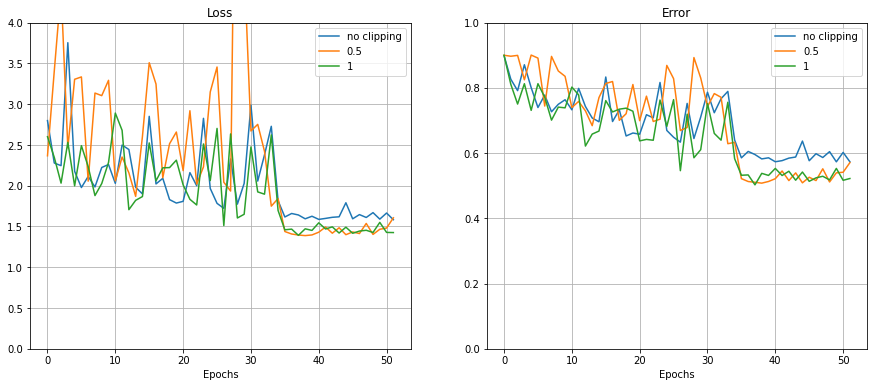

In [ ]:
plot_final_graph()

### decomposition_rank = 10

#### Model without clipping

In [12]:
model, model_type = functions.define_and_compile_ResNet_model(
    input_shape, conv_layer = functions.ConvDecomposed2D, decomposition_rank=10)
model.summary()

Learning rate:  0.001
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv_decomposed2d_99 (ConvDecom (None, 32, 32, 16)   455         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_93 (BatchNo (None, 32, 32, 16)   64          conv_decomposed2d_99[0][0]       
__________________________________________________________________________________________________
activation_93 (Activation)      (None, 32, 32, 16)   0           batch_normalization_93[0][0]     
______________________________________________________________________

In [13]:
history = functions.run_training(model, model_type, x_train, y_train, x_test, y_test,
                       'R_10_trainHistoryDict', steps_per_epoch=100, batch_size=100,
                       epochs=500)

Using real-time data augmentation.
Epoch 1/500
Learning rate:  0.001
100/100 [==============================] - 27s 189ms/step - loss: 3.9313 - acc: 0.1800 - val_loss: 4.2233 - val_acc: 0.1069

Epoch 00001: val_acc improved from -inf to 0.10690, saving model to /content/saved_models/cifar10_ResNet32v1_model.001.h5
Epoch 2/500
Learning rate:  0.001
100/100 [==============================] - 17s 168ms/step - loss: 2.1977 - acc: 0.3188 - val_loss: 2.4057 - val_acc: 0.2615

Epoch 00002: val_acc improved from 0.10690 to 0.26150, saving model to /content/saved_models/cifar10_ResNet32v1_model.002.h5
Epoch 3/500
Learning rate:  0.001
100/100 [==============================] - 17s 168ms/step - loss: 2.0574 - acc: 0.3732 - val_loss: 3.1085 - val_acc: 0.2366

Epoch 00003: val_acc did not improve from 0.26150
Epoch 4/500
Learning rate:  0.001
100/100 [==============================] - 17s 168ms/step - loss: 1.9761 - acc: 0.3943 - val_loss: 2.6294 - val_acc: 0.2979

Epoch 00004: val_acc improved fr

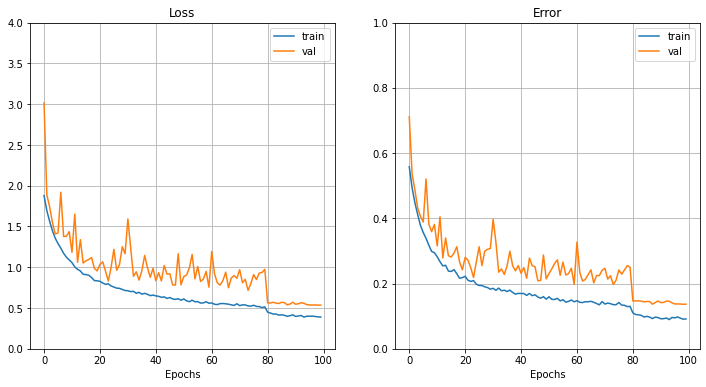

In [14]:
import pickle
from matplotlib import pyplot as plt

history = pickle.load(open('R_10_trainHistoryDict', "rb"))
functions.plot_loss_acc(history, 4, 1)

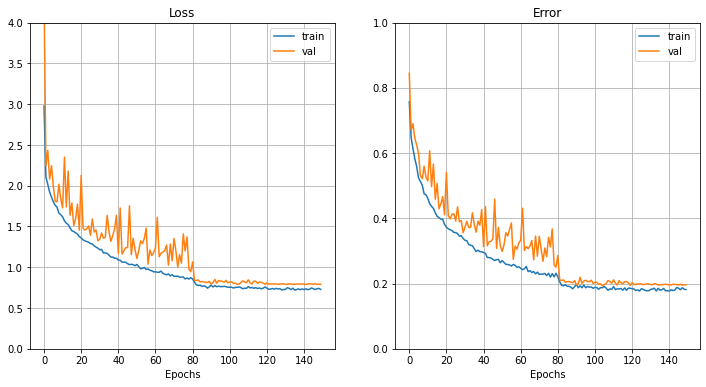

In [ ]:
import pickle
from matplotlib import pyplot as plt

history = pickle.load(open('R_10_trainHistoryDict', "rb"))
functions.plot_loss_acc(history, 4, 1)

In [ ]:
1 - history['val_acc'][-1]

0.19609999656677246

#### Model with clipping to 0.5

In [ ]:
model, model_type = functions.define_and_compile_ResNet_model(
    input_shape, conv_layer = functions.ConvDecomposed2D, decomposition_rank=10)
model.summary()

Learning rate:  0.001
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv_decomposed2d_66 (ConvDecom (None, 32, 32, 16)   1106        input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_62 (BatchNo (None, 32, 32, 16)   64          conv_decomposed2d_66[0][0]       
__________________________________________________________________________________________________
activation_62 (Activation)      (None, 32, 32, 16)   0           batch_normalization_62[0][0]     
______________________________________________________________________

In [ ]:
callbacks = functions.standard_callbacks(model_type) + [functions.Clipping(0.5)]
history = functions.run_training(model, model_type, x_train, y_train, x_test, y_test,
                       'R_10_trainHistoryDict_clip_05', steps_per_epoch=100, epochs=150,
                       callbacks=callbacks)

Using real-time data augmentation.
Epoch 1/150
Learning rate:  0.001
100/100 [==============================] - 19s 125ms/step - loss: 6.0591 - acc: 0.1605 - val_loss: 8.9885 - val_acc: 0.1152

Epoch 00001: val_acc improved from -inf to 0.11520, saving model to /content/saved_models/cifar10_ResNet32v1_model.001.h5
Epoch 2/150
Learning rate:  0.001
100/100 [==============================] - 11s 109ms/step - loss: 2.1153 - acc: 0.2245 - val_loss: 2.3969 - val_acc: 0.1000

Epoch 00002: val_acc did not improve from 0.11520
Epoch 3/150
Learning rate:  0.001
100/100 [==============================] - 11s 109ms/step - loss: 1.7611 - acc: 0.3489 - val_loss: 2.4027 - val_acc: 0.1000

Epoch 00003: val_acc did not improve from 0.11520
Epoch 4/150
Learning rate:  0.001
100/100 [==============================] - 11s 107ms/step - loss: 1.6382 - acc: 0.4113 - val_loss: 2.4945 - val_acc: 0.1000

Epoch 00004: val_acc did not improve from 0.11520
Epoch 5/150
Learning rate:  0.001
100/100 [==============

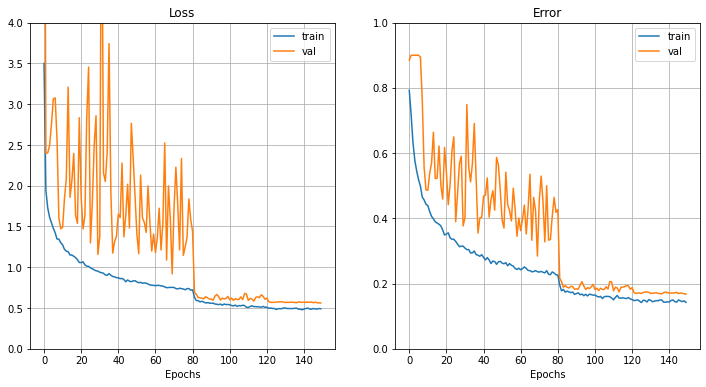

In [ ]:
import pickle
from matplotlib import pyplot as plt

history = pickle.load(open('R_10_trainHistoryDict_clip_05', "rb"))
functions.plot_loss_acc(history, 4, 1, 150)

In [ ]:
1 - history['val_acc'][-1]